In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import sys
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils
from tqdm.notebook import tqdm

In [3]:
path_users = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/users/"
path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Giada/Files/"
path_df = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/"

In [3]:
users_files = glob.glob(path_users + "*.csv")
df = pd.DataFrame()
for file in tqdm(users_files):
    df = pd.concat([df,pd.read_csv(file, lineterminator="\n", encoding="utf-8", low_memory=False)],  ignore_index=True)
df.drop_duplicates(subset=["id"],keep="last", inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
df["not_found"].unique()

array([nan, False, True], dtype=object)

In [44]:
df.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url',
       'protected', 'followers_count', 'friends_count', 'listed_count',
       'created_at', 'favourites_count', 'geo_enabled', 'verified',
       'statuses_count', 'contributors_enabled', 'default_profile',
       'default_profile_image', 'not_found', 'code', 'message\r'],
      dtype='object')

In [43]:
path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Giada/Files/"
path_df = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/"

good_lst = list(pd.read_csv(path + "good.csv")["screen_name"])
bad_lst = list(pd.read_csv(path + "bad.csv")["screen_name"])

good_rt_lst = list(pd.read_csv(path_df + "good_rt.csv")["screen_name"])
bad_rt_lst = list(pd.read_csv(path_df + "bad_rt.csv") ["screen_name"])

In [48]:
# lst = []
# for row in tqdm(df.itertuples()):
#     if row.screen_name in bad_rt_lst:
#         lst.append(row.location)
# locations = pd.Series(lst).dropna()
locations.value_counts().sort_values(ascending=False)

Italia                          536
Roma, Lazio                     222
Milano, Lombardia               166
Italy                           157
Roma                            150
                               ... 
Italia (terra meravigliosa)       1
Santa Teresa di Riva-Sicilia      1
Roma, Italia 🇮🇹                   1
Eretta                            1
Atlantide                         1
Length: 3196, dtype: int64

In [53]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="gianluca.nogara@gmail.com")
location = []
latitude = []
longitude = []
number = []
coordinates = []
count = []
location = list(locations.value_counts().sort_values(ascending=False).keys())
number = list(locations.value_counts().sort_values(ascending=False).values)

                    
#Traduzione degli indirizzi in località e rimozione delle località non valide
for i in tqdm(range(len(location))):
    try:
        coordinates = geolocator.geocode(location[i])
        if(coordinates != None):
            if((not coordinates.latitude in latitude) and (not coordinates.longitude in longitude)):
                latitude.append(coordinates.latitude)
                longitude.append(coordinates.longitude)
                count.append(number[i])
    except Exception as e:
        print(e)
#Creazione dataframe con coordinate e numero di lanci
dataf = pd.DataFrame(
                            {'Latitude': latitude,
                            'Longitude': longitude,
                            'number' : count})

HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=San+Jose%2C+CA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=UAE_d-_-b_ITALY&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=A&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=En+La+Banana+Republik&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSCon

In [54]:
#Inizializzazione mappa
px.set_mapbox_access_token("open-street-map")

#Inserimento dei dati dal dataframe
fig1= px.scatter_geo(dataf, lat=dataf.Latitude, lon=dataf.Longitude)
fig = px.scatter_mapbox(dataf,
                            lat=dataf.Latitude,
                            lon=dataf.Longitude,
                            mapbox_style="open-street-map",
                            size="number",
                            zoom = 1)

#Visualizzazione grafica della mappa
fig.show()

# Suspended

In [4]:
good_rt_sus = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/good_rt_status.csv",
                         lineterminator="\n", encoding="utf-8", low_memory=False)
bad_rt_sus = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/bad_rt_status.csv",
                         lineterminator="\n", encoding="utf-8", low_memory=False)
count = 0
cont_error = 0
bad_rt = []
good_rt = []
for row in bad_rt_sus.itertuples():
    if "message" in str(row.status_id):
        cont_error = cont_error + 1
        print(row.status_id)
        print(row.screen_name)
        bad_rt.append(row.screen_name)
    if "suspended" in str(row.status_id):
#         bad_rt.append(row.screen_name)
        count = count + 1
print(f"Bad rt suspended: {count} out of {len(bad_rt_sus)}, {count/len(bad_rt_sus)*100}%")
print(f"Bad rt errors on suspended: {cont_error}, {count/cont_error*100}%")

count = 0
cont_error = 0
for row in good_rt_sus.itertuples():
    if "message" in str(row.status_id):
        cont_error = cont_error + 1
    if "suspended" in str(row.status_id):
        good_rt.append(row.screen_name)
        count = count + 1
print(f"Good rt suspended: {count} out of {len(good_rt_sus)}, {count/len(good_rt_sus)*100}%")
print(f"Good rt errors on suspended: {cont_error}, {count/cont_error*100}%")
     

[{'code': 63, 'message': 'User has been suspended.'}]
Graziel65255465
[{'code': 63, 'message': 'User has been suspended.'}]
daninovaro
[{'code': 50, 'message': 'User not found.'}]
6harvest_ny
[{'code': 50, 'message': 'User not found.'}]
Sil25Par
[{'code': 63, 'message': 'User has been suspended.'}]
manu_etoile
[{'code': 50, 'message': 'User not found.'}]
Pzzglc67d03
[{'code': 63, 'message': 'User has been suspended.'}]
Daniela192601
[{'code': 63, 'message': 'User has been suspended.'}]
panibbi
[{'code': 50, 'message': 'User not found.'}]
Carlo_A_Macc
[{'code': 50, 'message': 'User not found.'}]
ShunaSnowSWL
[{'code': 50, 'message': 'User not found.'}]
LuisTheHammer
[{'code': 63, 'message': 'User has been suspended.'}]
Massi2712
[{'code': 50, 'message': 'User not found.'}]
Primula23244790
[{'code': 63, 'message': 'User has been suspended.'}]
ubikurbs
[{'code': 50, 'message': 'User not found.'}]
tonykoko78
[{'code': 50, 'message': 'User not found.'}]
mra_amico
[{'code': 50, 'message': 'U

SCPFRZ
[{'code': 63, 'message': 'User has been suspended.'}]
Claudio69407716
[{'code': 63, 'message': 'User has been suspended.'}]
censurastocazz1
[{'code': 50, 'message': 'User not found.'}]
Rolxani
[{'code': 50, 'message': 'User not found.'}]
miki8866886600
[{'code': 63, 'message': 'User has been suspended.'}]
Stevedark79
[{'code': 50, 'message': 'User not found.'}]
culovra
[{'code': 50, 'message': 'User not found.'}]
NasiniRosella
[{'code': 50, 'message': 'User not found.'}]
rac_belli
[{'code': 63, 'message': 'User has been suspended.'}]
Mario16081972
[{'code': 63, 'message': 'User has been suspended.'}]
LuisaCipriani2
[{'code': 50, 'message': 'User not found.'}]
wakeupcerpin
[{'code': 63, 'message': 'User has been suspended.'}]
fratuccio2
[{'code': 63, 'message': 'User has been suspended.'}]
AlexSanna38
[{'code': 63, 'message': 'User has been suspended.'}]
missonostufata
[{'code': 50, 'message': 'User not found.'}]
Saladino__Italy
[{'code': 63, 'message': 'User has been suspended.'

In [9]:
import tweepy
import json
jsonFile = open('C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/id_finder/auth.json', 'r')
config = json.load(jsonFile)
jsonFile.close()
consumer_key = config["consumer_key"]
consumer_secret = config["consumer_secret"]
access_token = config["access_token"]
access_token_secret = config["access_token_secret"]
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
try:
    user = api.get_user(screen_name="TyCharleneBr")
except tweepy.errors.NotFound as e:
    print("Tweepy Error: {}".format(e))
except tweepy.errors.Forbidden as e:
    print("Tweepy Error: {}".format(e))
except tweepy.errors.TooManyRequests as e:
    print("Tweepy Error: {}".format(e))

Tweepy Error: 404 Not Found
50 - User not found.


In [5]:
tweets = pd.read_parquet(path_df + "tweets.parquet", engine="fastparquet")
tweets.head()

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count
0,1221739084449832960,1221739084449832960,Mon Jan 27 10:17:51 +0000 2020,241972508,planetpaul65,False,Sun Jan 23 16:31:07 +0000 2011,La Memoria è l’unico vaccino contro l’indiffer...,"<a href=""http://twitter.com/download/android"" ...",None,...,None,"[{'text': 'GiornatadellaMemoria2020', 'indices...",[],"[{'screen_name': 'isentinelli', 'name': '@isen...",[],[],"[{'id': 1221708229090127872, 'id_str': '122170...",NaN,NaN,NaN
1,1221737155380293640,1221737155380293640,Mon Jan 27 10:10:11 +0000 2020,1179711277,Grace_1207,False,Thu Feb 14 16:37:35 +0000 2013,"Oggi sono arrivati loro, 3 femminucce e 1 masc...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,None,[],[],"[{'screen_name': 'LidaSezOlbia', 'name': 'Lida...",[],[],[],NaN,NaN,NaN
2,1221730009989120001,1221730009989120001,Mon Jan 27 09:41:47 +0000 2020,115121530,MarisaMinervini,False,Wed Feb 17 17:40:09 +0000 2010,L'indifferenza è più colpevole della violenza ...,"<a href=""http://twitter.com/download/android"" ...",None,...,None,[],[],"[{'screen_name': 'milio967', 'name': 'Εμιλιο ♌...",[],[],[],NaN,NaN,NaN
3,1221737654909382662,1221737654909382662,Mon Jan 27 10:12:10 +0000 2020,589884969,LecceSette,False,Fri May 25 08:09:46 +0000 2012,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,...,None,[],[],[],"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],[],NaN,NaN,NaN
4,1221728980203724801,1221728980203724801,Mon Jan 27 09:37:42 +0000 2020,908731428124397568,arual812,False,Fri Sep 15 16:37:10 +0000 2017,"""Coltivare la Memoria è ancora oggi un vaccino...","<a href=""http://twitter.com/download/android"" ...",None,...,None,[],[],"[{'screen_name': 'Annalisa3073', 'name': 'Anna...",[],[],[],NaN,NaN,NaN


In [6]:
tweets_good_suspended = tweets[tweets["user_screen_name"].isin(good_rt)]
# tweets_bad_suspended = tweets[tweets["user_screen_name"].isin(bad_rt)]

# Novax suspended

In [85]:
for i in tweets_bad_suspended.itertuples():
    if i.user_screen_name == "Gutsneedfartin":
        print("-------------------")
        print("Screen name:", i.user_screen_name)
        print("Testo:")
        print(i.text)
        print("Data di creazione:", i.created_at)
        print("-------------------")

-------------------
Screen name: Gutsneedfartin
Testo:
Crediamo che questo video possa essere risolutivo per molti. Beppe Grillo 1998: "I vaccini sono una truffa. Le multinazionali del cazzo ti fanno ammalare." Beppe Grillo 2020: "La sfida attuale è quella di trovare vaccino per Covid." Beppe quattro denari. https://t.co/kJWQdnGGHv https://t.co/kwbSv3NMDj
Data di creazione: Mon Nov 30 16:35:20 +0000 2020
-------------------
-------------------
Screen name: Gutsneedfartin
Testo:
Salerno, carabiniere 50enne muore per trombosi dopo vaccino AstraZeneca https://t.co/srRJxZXZdM
Data di creazione: Sat Mar 20 14:34:07 +0000 2021
-------------------


In [7]:
# TODO CON SOLI SOSPESI
tweets_good_suspended.reset_index(drop=True, inplace=True)
tweets_good_suspended.to_parquet(path_df + "tweets_good_suspended.parquet", index=False)

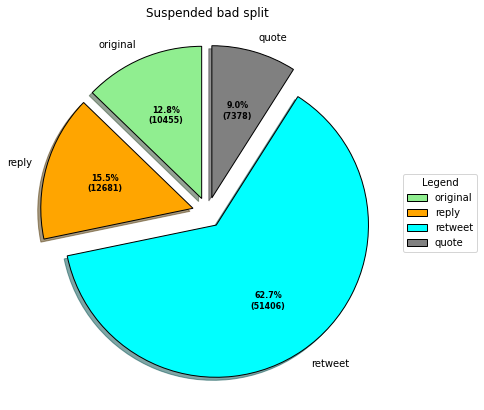

In [56]:
splitted = utils.split(tweets_bad_suspended)
labels = list(splitted.keys())
values = list(splitted.values())
utils.print_pie_chart4("Suspended bad split", labels, values)

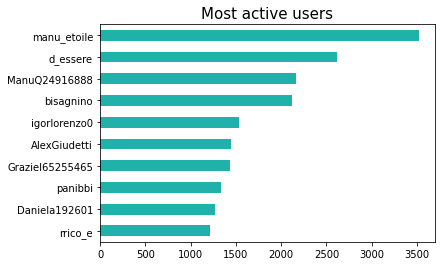

In [57]:
val = tweets_bad_suspended["user_screen_name"].value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='lightseagreen') #red #darkturquoise
ax.set_title('Most active users', fontsize=15)
ax.invert_yaxis()
plt.show()

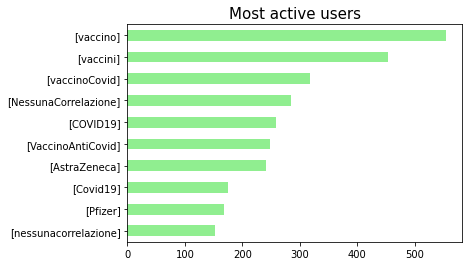

In [58]:
val = pd.Series(utils.hashtag_process_list(tweets_bad_suspended["hashtags"])).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[1:11].plot(kind='barh', color='lightgreen') #red #darkturquoise
ax.set_title('Most active users', fontsize=15)
ax.invert_yaxis()
plt.show()

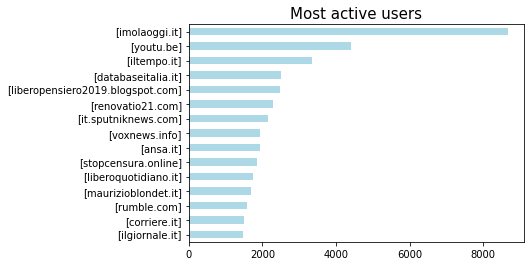

In [60]:
val = pd.Series(utils.extract_domain_list(tweets_bad_suspended)).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[2:17].plot(kind='barh', color='lightblue') #red #darkturquoise
ax.set_title('Most active users', fontsize=15)
ax.invert_yaxis()
plt.show()

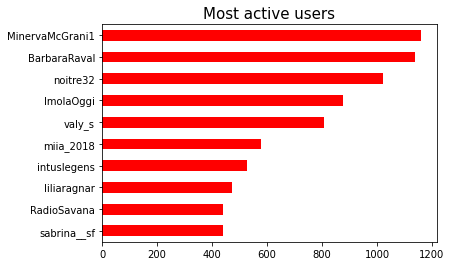

In [61]:
val = pd.Series(tweets_bad_suspended["rt_user_screen_name"]).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='red') #red #darkturquoise
ax.set_title('Most active users', fontsize=15)
ax.invert_yaxis()
plt.show()

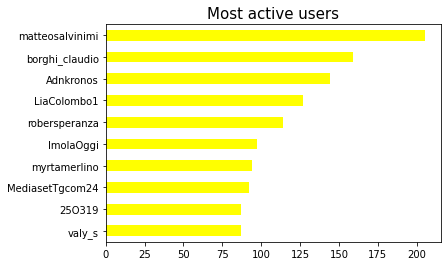

In [62]:
val = pd.Series(tweets_bad_suspended["in_reply_to_screen_name"]).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='yellow') #red #darkturquoise
ax.set_title('Most active users', fontsize=15)
ax.invert_yaxis()
plt.show()

# Provax suspended

In [66]:
tweets_good_suspended.reset_index(drop=True, inplace=True)
tweets_good_suspended

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count
0,1221724140081766400,1221724140081766400,Mon Jan 27 09:18:28 +0000 2020,111906743,summerofciuccio,False,Sat Feb 06 15:09:15 +0000 2010,La memoria è il vaccino contro l’antisemitismo...,"<a href=""http://twitter.com/download/android"" ...",None,...,None,[],[],"[{'screen_name': 'LottiLuca', 'name': 'Luca Lo...",[],[],[],NaN,NaN,NaN
1,1222092255261069312,1222092255261069312,Tue Jan 28 09:41:13 +0000 2020,1063191421937684481,ve10ve,False,Thu Nov 15 22:06:02 +0000 2018,@BarillariM5S È un effetto collaterale delle v...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,None,[],[],"[{'screen_name': 'RobertoBurioni', 'name': 'Ro...",[],[],[],NaN,NaN,NaN
2,1223000916443455488,1223000916443455488,Thu Jan 30 21:51:55 +0000 2020,2407829022,sindfrei_,False,Sun Mar 23 21:50:06 +0000 2014,@morsmordraco @HeelGianz Per arrivare ad un va...,"<a href=""http://twitter.com/download/android"" ...",None,...,None,[],[],"[{'screen_name': 'morsmordraco', 'name': 'Chia...",[],[],[],NaN,NaN,NaN
3,1222987335773696007,1222987335773696007,Thu Jan 30 20:57:57 +0000 2020,1063191421937684481,ve10ve,False,Thu Nov 15 22:06:02 +0000 2018,"Un #novax mi spiega che ""appunto, al limite i ...","<a href=""http://twitter.com/download/android"" ...",None,...,None,"[{'text': 'novax', 'indices': [24, 30]}, {'tex...",[],"[{'screen_name': 'manginobrioches', 'name': 'M...",[],[],[],NaN,NaN,NaN
4,1223203779295817728,1223203779295817728,Fri Jan 31 11:18:01 +0000 2020,1166032900028022786,luigipelli,False,Mon Aug 26 17:01:47 +0000 2019,"@redazioneiene , parlateci del #coronavirus......","<a href=""http://twitter.com/download/android"" ...",None,...,None,"[{'text': 'coronavirus', 'indices': [31, 43]}]",[],"[{'screen_name': 'redazioneiene', 'name': 'Le ...",[],[],[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,1394566079767265281,1394566079767265281,Tue May 18 08:10:37 +0000 2021,1063191421937684481,ve10ve,False,Thu Nov 15 22:06:02 +0000 2018,"Un mese fa ho fatto Astra Zeneca, dose avanzat...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,None,[],[],"[{'screen_name': 'Marco_dreams', 'name': 'Marc...",[],[],[],411632.0,9162.0,8332.0
11818,1394566214278594564,1394566214278594564,Tue May 18 08:11:09 +0000 2021,975114092183777286,roma_paoletta,False,Sat Mar 17 20:58:11 +0000 2018,"Che fate schifo ve l'ho già detto, ma mi ripet...","<a href=""http://twitter.com/download/android"" ...",None,...,Thu Jan 05 07:42:54 +0000 2012,[],[],[],"[{'url': 'https://t.co/v2KgJdjhTF', 'expanded_...",[],[],58046.0,1097.0,1966.0
11819,1394568792240529409,1394568792240529409,Tue May 18 08:21:24 +0000 2021,975114092183777286,roma_paoletta,False,Sat Mar 17 20:58:11 +0000 2018,"Eccomi, sono uscita adesso ho fatto la prima d...","<a href=""http://twitter.com/download/android"" ...",None,...,None,"[{'text': 'vacinada', 'indices': [119, 128]}]",[],[],[],[],[],58046.0,1100.0,1967.0
11820,1394605063344119808,1394605063344119808,Tue May 18 10:45:32 +0000 2021,1063191421937684481,ve10ve,False,Thu Nov 15 22:06:02 +0000 2018,"Se ora l’Italia riparte, non è merito di chi v...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,None,[],[],"[{'screen_name': 'GiovaValentini', 'name': 'Gi...",[],[],[],411638.0,9161.0,8331.0


In [72]:
for i in tweets_good_suspended.itertuples():
    if i.user_screen_name == "ve10ve":
        print("-------------------")
        print("Screen name:", i.user_screen_name)
        print("Testo:")
        print(i.text)
        print("-------------------")

-------------------
Screen name: ve10ve
Testo:
@BarillariM5S È un effetto collaterale delle vaccinazioni.
-------------------
-------------------
Screen name: ve10ve
Testo:
Un #novax mi spiega che "appunto, al limite i #vaccini servono quando c'è un'epidemia, ma se non c'è, perché vaccinarsi? Io per il #coronavirus mi vaccinerei, per il morbillo no. È semplice".
Al limite.
-------------------
-------------------
Screen name: ve10ve
Testo:
Rinuncia di proprietà Ric.e Con.
Mila, un anno, taglia piccola cerca casa
Purtroppo per seri motivi la famiglia è costretta a cederla, ha un carattere molto socievole
Verrà affidata sterilizzata, con chip e vaccini dopo regolare preaffido
Agrigento
Info Sara 3246135557 https://t.co/ij11xkDmXz
-------------------
-------------------
Screen name: ve10ve
Testo:
Non vogliono le vaccinazioni, non vogliono #Immuni, non vogliono le mascherine ma appena hanno due linee di febbre si cagano addosso e corrono in Pronto Soccorso .....

Chi sono?

#COVIDIOTS
-----

Screen name: ve10ve
Testo:
Salvini è il guru della paura. Spinge gli italiani a non fidarsi degli stranieri, a odiare gli immigrati, a tenere lontani i cinesi, ad avere terrore dei vaccini e dell'influenza. Quando impareremo ad avere paura di lui sarà troppo tardi e l'Italia sarà un Paese peggiore
-------------------
-------------------
Screen name: ve10ve
Testo:
🔴 GITA SCOLASTICA A #CODOGNO
L'amministrazione comunale di #Bugliano ha autorizzato una gita di un giorno per immunizzare i nostri bimbi in maniera naturale.
#Coronaviriusitalia #vaccini https://t.co/88eVmou4bN
-------------------
-------------------
Screen name: ve10ve
Testo:
È come con il #coronavirus: si possono ammalare tutti, ma i casi più gravi sembrano verificarsi in persone anziane con altre patologie. Al pari, la nostra economia è anziana, non cresce da 20 anni e il debito pubblico è il più alto d’Europa dopo la Grecia. https://t.co/xOc0burRSz
-------------------
-------------------
Screen name: ve10ve
Testo:
Quello c

Screen name: ve10ve
Testo:
#Putin annuncia che la Russia ha pronto il vaccino contro il #Covid_19 https://t.co/crGNR5BPz4
-------------------
-------------------
Screen name: ve10ve
Testo:
Sintesi sulle scaramucce di oggi. Mentre si dibatte se rendere obbligatoria la vaccinazione teniamo in mente che non ce ne sarà abbastanza per tutti. Urge, quindi un piano per la sua somministrazione per offrire una protezione strategica per il paese e mirata a chi ne ha bisogno https://t.co/QeodPp2yMu
-------------------
-------------------
Screen name: ve10ve
Testo:
#Putin annuncia che la Russia ha pronto il vaccino contro il #Covid_19 https://t.co/crGNR5BPz4
-------------------
-------------------
Screen name: ve10ve
Testo:
“Con una copertura più ampia del #vaccino antinfluenzale meno morti per #coronavirus”: lo studio https://t.co/OdRJ0tVTY9 via @fattoquotidiano
-------------------
-------------------
Screen name: ve10ve
Testo:
Un milione di persone hanno perso la vita per il Covid. È un numero i

-------------------
Screen name: ve10ve
Testo:
#Bersani:

1) Conte è meglio di come è stato raccontato dallo snobismo di qualche commentatori;
2) Conte ha portato i 5 Stelle su una posizione europeista;
3) Siam il Paese che ha preso più soldi sul Recovery e siamo primi in per le vaccinazioni: Conte avrà qualche merito?

#CTCF
-------------------
-------------------
Screen name: ve10ve
Testo:
È curioso notare come gente che passa il giorno a confutare verità scientifiche, negare l'utilità dei vaccini, costruire astruse teorie complottiste sul covid e la dittatura del gender, quando si tratta di difendere #Bagnai, lo faccia elencando i suoi titoli di studio.
-------------------
-------------------
Screen name: ve10ve
Testo:
È interessante notare come la stampa per "tranquillizzare" la gente, faccia credere che ci siano vaccini Pubblici: AstraZeneca diventa Oxford/Pomezia ed "inventano" pure un vaccino "Italiano" dello Spallanzani. La gente vuole e si fida di ricerca e sanità Pubbliche...

-------------------
-------------------
Screen name: ve10ve
Testo:
Considerando la situazione dei contagi fatemi #AstraZeneca o #Pfizer, o il vaccino cubano, oppure lo #Sputnik non importa, pure l'acqua del cesso va bene se funziona contro il covid. Grazie.

#COVID19 #vaccini #terzaondata
-------------------
-------------------
Screen name: ve10ve
Testo:
Secondo grande risultato già ottenuto dal governo Draghi ancor prima di insediarsi: oltre ai No Euro sono spariti anche quelli che contano i vaccini giorno dopo giorno.
-------------------
-------------------
Screen name: ve10ve
Testo:
Dopo i risultati annunciati ieri, il Sud Africa ha deciso di rinunciare all'uso del vaccino Astrazeneca e fare affidamento solo su Pfizer e Johnson and Johnson. 

https://t.co/GQ72av0N6N
-------------------
-------------------
Screen name: ve10ve
Testo:
"Oggi l'Italia è il secondo paese in Europa, dopo la Germania, per numero di somministrazione di vaccino. Ed è il primo paese per numero di persone che h

Testo:
#Salvini blatera contro le restrizioni, un irresponsabile al governo. 
Mentre c’è ancora un ritardo su #DLRistori, perchè?
Governo miope: doveva fare subito Dl ristori e immediatamente dopo proporre restrizioni.
#COVID19 #vaccino https://t.co/MphBJktW0q
-------------------
-------------------
Screen name: ve10ve
Testo:
Prima il caso McKinsey, poi la falla nel sistema di prenotazione dei vaccini in Lombardia: due super notizie in pochi giorni di @radiopopmilano. Così a occhio l'arrivo di @piovonorane alla direzione sta dando ottimi frutti (la base di partenza era già ottima)
-------------------
-------------------
Screen name: ve10ve
Testo:
Pfizer annuncia licenziamenti in Belgio per delocalizzare in Romania.
In Italia aveva già provveduto in dicembre.
E con i vaccini siamo in ritardo.
Pfizer avrà un utile di 3,3 miliardi, grazie alle nostre disgrazie e alla debolezza dei Governi.
Tutto questo è sopportabile?
-------------------
-------------------
Screen name: ve10ve
Testo:
Furb

-------------------
Screen name: ve10ve
Testo:
Eggià https://t.co/ctvNn2WgrF
-------------------
-------------------
Screen name: ve10ve
Testo:
💉#COVID19, PRIMI EFFETTI DEL #VACCINO NELLE RSA 

🏘️Nelle strutture residenziali in calo incidenza, residenti isolati e, in misura minore, anche decessi.

🔎Notizia 👇
https://t.co/t40vQicAe7
🔎Report Sorveglianza ISS - @MinisteroSalute 👇
https://t.co/M0DN4jy7kb

#Covid19Italia https://t.co/LhmaQPd3RG
-------------------
-------------------
Screen name: ve10ve
Testo:
Aperte a mezzanotte le prenotazioni del vaccino anti Covid per chi ha 68 e 69 anni. In poche ore fissati 37mila appuntamenti, avanti #senzasosta #LazioSiVaccina
-------------------
-------------------
Screen name: ve10ve
Testo:
"Chi sono io per obbligare un operatore sanitario a vaccinarsi?" Con questa frase, #Salvini allarga la schiera dei suoi "protetti" ai negazionisti. Ora è il padino della peggiore Italia: razzisti, omofobi, evasori e negazionisti!
-------------------
-----------

-------------------
Screen name: ve10ve
Testo:
Tra pochi giorni è un mese di Governo Draghi. Il piano vaccini è ancora quello del Governo Conte. Le Regioni vanno in ordine sparso. Il Dpcm di restrizioni di una settimana fa doveva durare fino a Pasqua, ma ce ne sarà un altro, come a Natale. 

Qualcuno lo chiama cambio di passo
-------------------
-------------------
Screen name: ve10ve
Testo:
Stasera non parlerò di Renzi. 

Pur con tutti i problemi che ci affliggono sono felice di vivere in un Paese nel quale la sanità è pubblica ed il vaccino gratuito. Guardo con orrore a Paesi come Dubai dove basta essere sfondati di soldi per avere il vaccino e saltare la fila.
-------------------
-------------------
Screen name: ve10ve
Testo:
Spiegate a quelli di #ArabiaViva che subito dopo gli over80 erano già previste le persone con disabilità di qualsiasi età in concomitanza con gli over70. Ditegli pure che se ci siamo dovuti fermare è perché mancano i vaccini per queste persone che devono essere

Testo:
Interessante che nei titoli sul blocco del vaccino AstraZeneca la parola Draghi non appare mai. Fosse successo 6 settimane fa ho il sospetto che il nome del PM che l’ha deciso l’avrebbero messo. Ma forse mi sbaglio io. https://t.co/nLLfAhFIo1
-------------------
-------------------
Screen name: ve10ve
Testo:
Fa gli auguri e #LunaRossa perde, si ricorda dei vaccini, dopo un anno di negazionismo, e #AstraZeneca viene bloccata.
#Salviniportasfiga è stato già ricordato?
-------------------
-------------------
Screen name: ve10ve
Testo:
E comunque il vaccino Pfizer è il migliore. Mio marito l'ha fatto e ora trova i calzini nel cassetto al primo colpo.

(Lucillola @LucillaMasini)

#17marzo #Pfizer #vaccino
-------------------
-------------------
Screen name: ve10ve
Testo:
Già mi vedo i titoli: “Muore a Roncobilaccio durante un massiccio bombardamento con testate atomiche, aveva da poco fatto il vaccino”.

#BidenVsPutin
-------------------
-------------------
Screen name: ve10ve
Testo:

-------------------
Screen name: ve10ve
Testo:
"Ci vuole un internazionalismo dei vaccini"
#internazionalismo: possibile ci volesse di nuovo @Pontifex_it per restituire il valore che merita alla visione che una sinistra smemorata e priva di fede ha relegato in soffitta?
(parola non scelta a caso, il contrario di #sovranismo) https://t.co/SAMbSVTkzD
-------------------
-------------------
Screen name: ve10ve
Testo:
Brutte notizie per i varianterroristi. Il vaccino Pfizer evita l’infezione asintomatica nei familiari dei malati. Questo in Israele dove domina la variante inglese. È sempre più probabile che i vaccini a mRNA prevengano il contagio e non solo la malattia. https://t.co/8ZQ7RQdzfV https://t.co/J0Ah1V72ap
-------------------
-------------------
Screen name: ve10ve
Testo:
Faccia a faccia di 40 minuti per #Letta e #Renzi. Convergenza sul sostegno a #Draghi per campagna #vaccini e #RecoveryPlan. Divergenza profonda, fanno sapere dal Nazareno,  su rapporto con #Conte e #M5s, essenzi

Screen name: ve10ve
Testo:
Il 9 aprile in Lombardia sono aperte le prenotazioni delle vaccinazioni per i cittadini con grave disabilità, non in carico a una struttura ospedaliera. Il portale di prenotazione è quello delle Poste e funziona, ma scoppia lo stesso il caos #Report lunedì in prima serata @RaiTre https://t.co/2vtybrGCKQ
-------------------
-------------------
Screen name: ve10ve
Testo:
La campagna vaccinale in Italia sta migliorando, ma non stiamo rispettando gli obiettivi fissati da Figliuolo. Abbiamo recuperato sugli over 80, ma siamo ancora molto indietro sui 70-79enni. Ne ho scritto su @PagellaPolitica. 

https://t.co/mhGHhE0pgp
-------------------
-------------------
Screen name: ve10ve
Testo:
Il 9/04 in Lombardia si sono aperte le prenotazioni delle vaccinazioni per i cittadini con estrema vulnerabilità o grave disabilità, non in carico a una struttura ospedaliera. Il portale di prenotazione è quello di Poste e funziona, ma scoppia lo stesso il caos. #Report https://t.c

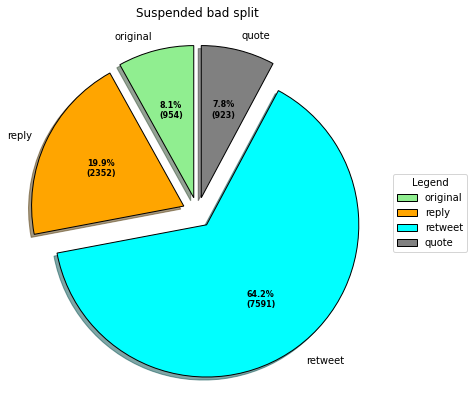

In [70]:
splitted = utils.split(tweets_good_suspended)
labels = list(splitted.keys())
values = list(splitted.values())
utils.print_pie_chart4("Suspended bad split", labels, values)

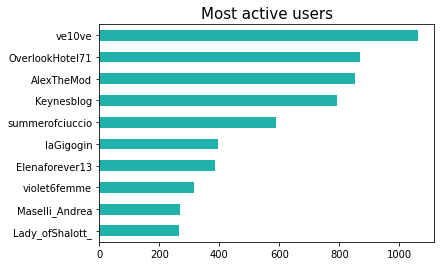

In [71]:
val = tweets_good_suspended["user_screen_name"].value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='lightseagreen') #red #darkturquoise
ax.set_title('Most active users', fontsize=15)
ax.invert_yaxis()
plt.show()

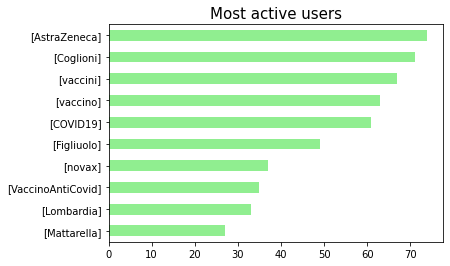

In [73]:
val = pd.Series(utils.hashtag_process_list(tweets_good_suspended["hashtags"])).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[1:11].plot(kind='barh', color='lightgreen') #red #darkturquoise
ax.set_title('Most active users', fontsize=15)
ax.invert_yaxis()
plt.show()

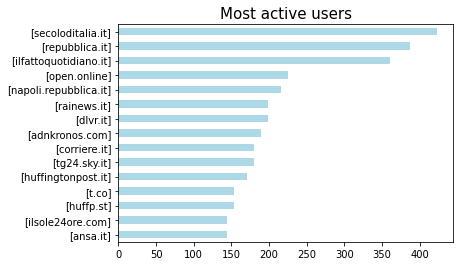

In [76]:
val = pd.Series(utils.extract_domain_list(tweets_good_suspended)).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[2:17].plot(kind='barh', color='lightblue') #red #darkturquoise
ax.set_title('Most active users', fontsize=15)
ax.invert_yaxis()
plt.show()

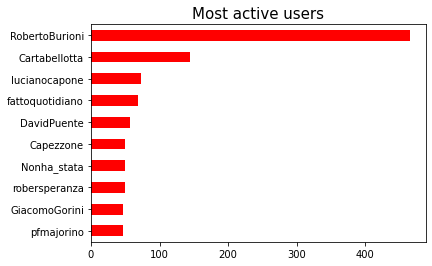

In [77]:
val = pd.Series(tweets_good_suspended["rt_user_screen_name"]).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='red') #red #darkturquoise
ax.set_title('Most active users', fontsize=15)
ax.invert_yaxis()
plt.show()

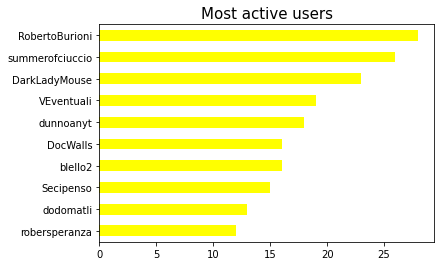

In [78]:
val = pd.Series(tweets_good_suspended["in_reply_to_screen_name"]).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='yellow') #red #darkturquoise
ax.set_title('Most active users', fontsize=15)
ax.invert_yaxis()
plt.show()